In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing  

In [35]:
import os
for dirname, _, filenames in os.walk('D:\color_detection\color_classification_svm\ColorClassification'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [37]:
DATADIR = 'D:\color_detection\color_classification_svm\ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

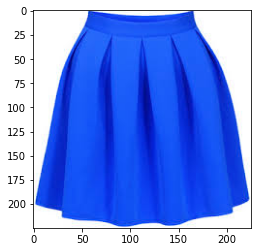

In [38]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [39]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 

In [40]:
print(len(training_data))
lenofimage = len(training_data)

107


In [41]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [42]:
X.shape

(107, 30000)

In [43]:
X = X/255.0

In [44]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

In [45]:
y=np.array(y)

In [46]:
y.shape

(107,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [49]:
y2 = svc.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.9259259259259259


In [51]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      0.71      0.83         7
           7       0.80      1.00      0.89         4

    accuracy                           0.93        27
   macro avg       0.94      0.96      0.94        27
weighted avg       0.94      0.93      0.92        27



In [52]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [53]:
result

,original,predicted
0,5,5
1,7,7
2,6,6
3,0,0
4,1,1
5,3,3
6,6,6
7,3,3
8,1,1
9,2,2
